# IMPORTS

In [196]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 
import folium 

from warnings import filterwarnings

filterwarnings('ignore')
%matplotlib inline

# READ THE DATA (main .csv file with data and .txt file with countries corrds)

In [197]:
data = pd.read_csv('./input/mad_project.csv')
locations = pd.read_csv('./loc_df.txt')
#data.head()
data.tail()

,countrycode,country,year,gdppc,pop
21677,ZWE,Zimbabwe,2014,1 594,13 314
21678,ZWE,Zimbabwe,2015,1 560,13 479
21679,ZWE,Zimbabwe,2016,1 534,13 665
21680,ZWE,Zimbabwe,2017,1 582,13 870
21681,ZWE,Zimbabwe,2018,1 611,14 097


In [198]:
locations

,CountryCode,Latitude,Longitude,Name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


In [199]:
countries = data['country'].unique()

In [200]:
local_ = {country: (lat, lon) for lat, lon, country in zip(locations['Latitude'], locations['Longitude'], locations['Name'])}

In [201]:
map = folium.Map(location=local_['Iceland'])
for corr in local_:
    folium.Marker(local_[corr], popup=f'<b>{corr}</b>', tooltip=f'Iam {corr}').add_to(map)

In [202]:
map

In [203]:
data.head()

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3 280
1,AFG,Afghanistan,1870,NaN,4 207
2,AFG,Afghanistan,1913,NaN,5 730
3,AFG,Afghanistan,1950,1 156,8 150
4,AFG,Afghanistan,1951,1 170,8 284


In [204]:
data.dropna(inplace=True)

In [205]:
data['pop'].isnull().sum()

0

In [206]:
data['pop'] = data['pop'].apply(lambda x: int(''.join(x.split())))

In [208]:
data.drop('countrycode', axis=1, inplace=True)

In [218]:
data.drop(['level_0', 'index'], axis=1, inplace=True)

In [226]:
data

,country,year,gdppc,pop
0,Afghanistan,1950,1 156,8150
1,Afghanistan,1951,1 170,8284
2,Afghanistan,1952,1 189,8425
3,Afghanistan,1953,1 240,8573
4,Afghanistan,1954,1 245,8728
...,...,...,...,...
15218,Zimbabwe,2014,1 594,13314
15219,Zimbabwe,2015,1 560,13479
15220,Zimbabwe,2016,1 534,13665
15221,Zimbabwe,2017,1 582,13870


In [234]:
data.groupby(by=['country'])['pop'].sum().sort_values(ascending=False)[:10]

country
China             79228912
India             76268955
United States     25026726
Former USSR       22598742
Indonesia         16040141
Japan             11719157
Brazil            11181227
Germany           10758001
France             8891882
United Kingdom     8678298
Name: pop, dtype: int64

<AxesSubplot:title={'center':'Top 10 Countries with highest population'}>

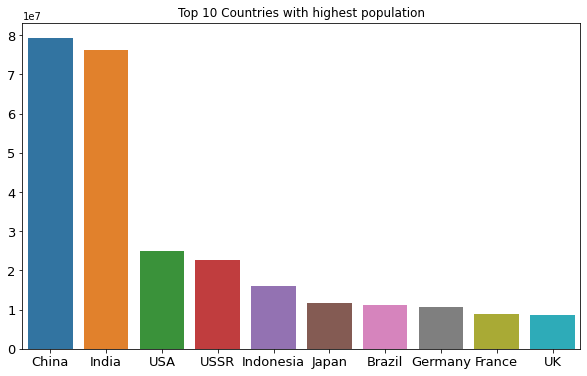

In [239]:
plt.figure(figsize=(10, 6))
plt.title('Top 10 Countries with highest population')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


sns.barplot(x=['China', 'India', 'USA', 'USSR', 'Indonesia', 'Japan', 'Brazil', 'Germany', 'France', 'UK'], y=[79228912,76268955, 25026726, 22598742, 16040141, 11719157, 11181227, 10758001,  8891882,  8678298])